# Step 1 - Install Quandl library

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

# Step 2 - Find & Import Data Set

In [2]:
# Configure API key
quandl.ApiConfig.api_key = 'riE-XcpkDbtzhd7jiSjB'

In [3]:
#Decided to go with United States Federal reserve data to see if there’s a link income & sports stats

data = quandl.get('FRED/MEHOINUSA672N')

In [4]:
data.head()

,Value
Date,
1984-01-01,53337.0
1985-01-01,54334.0
1986-01-01,56291.0
1987-01-01,56964.0
1988-01-01,57433.0


In [5]:
data.shape

(37, 1)

In [6]:
data.columns

Index(['Value'], dtype='object')

# Step 3 - Subset of data

I chose to not create a subset. The data goes back to 1984 which seems like a good starting point for this analysis

# Step 4 - line chart

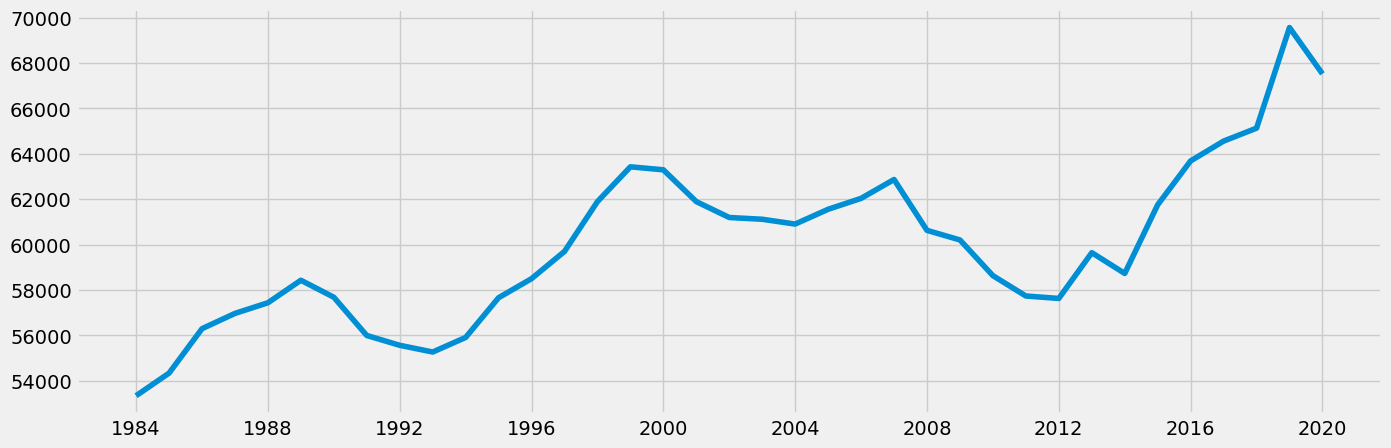

In [7]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 

plt.plot(data)

# Step 5 - Decompose the data’s components

In [8]:
# Decompose time series using additive model
decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [9]:
# Define fixed size for all charts
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

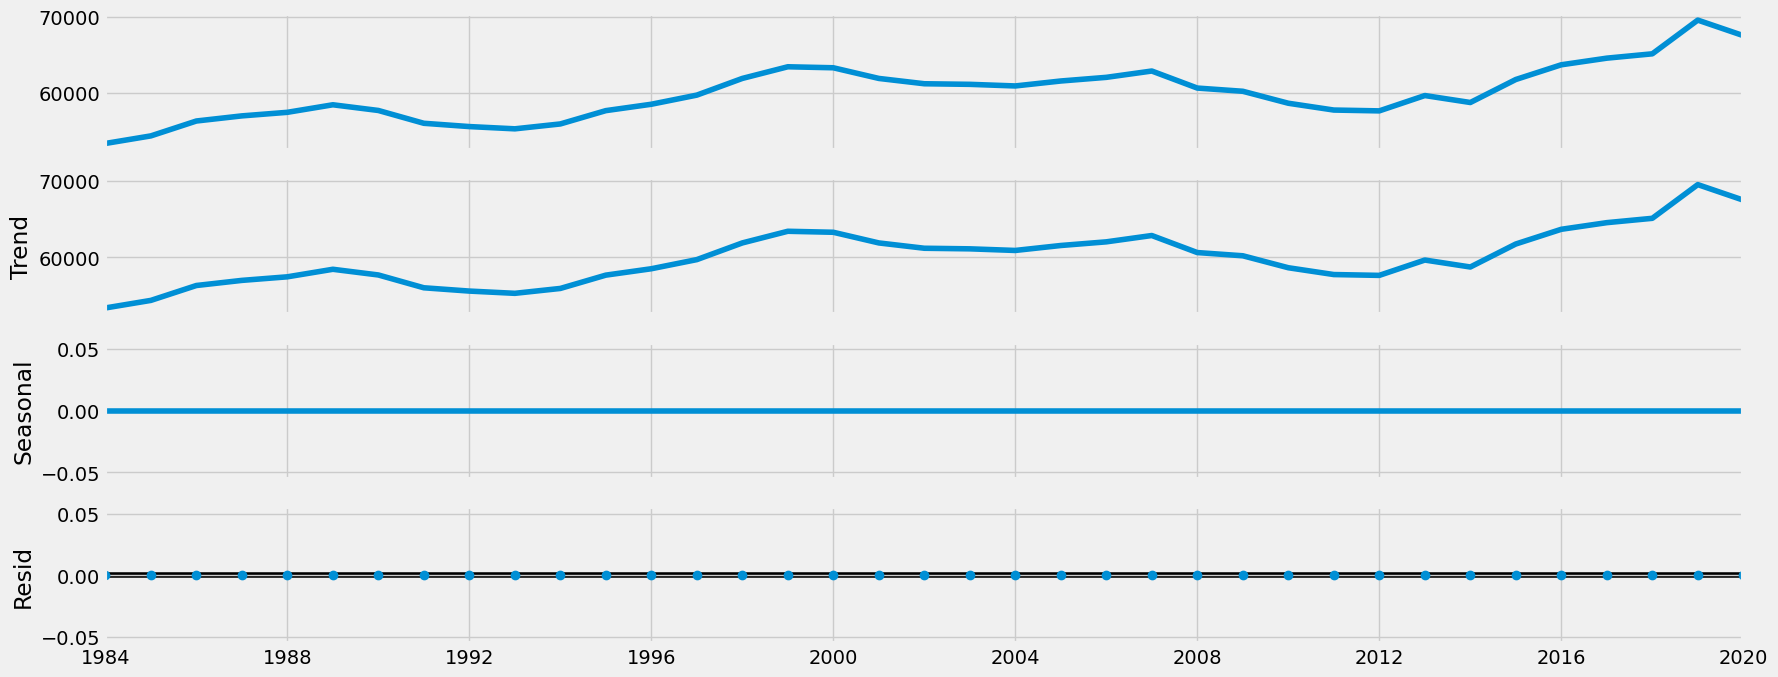

In [10]:
# Plot separate components

decomposition.plot()
plt.show()

There is an overall upward trend.  You can see this on graph in Step 4, however this graph smooths out the trend.  In addition there are no seasonal components. 

# Step 6 - Dickey-Fuller test

In [11]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller 

# Define the function
def dickey_fuller(timeseries): 
    
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.066512
p-value                         0.728240
Number of Lags Used             7.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


The test statistic is larger than the critical value, so we must stationarize the data.

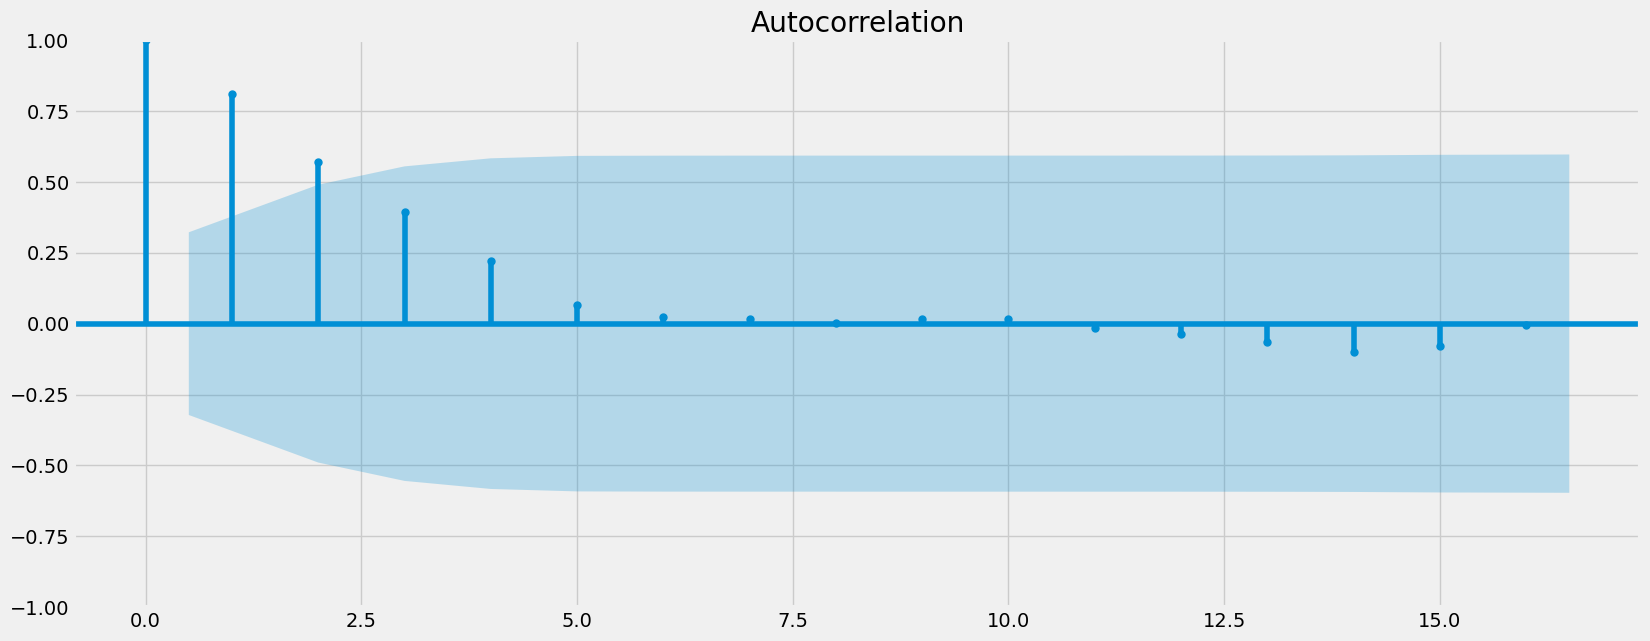

In [12]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(data)
plt.show()

Since there are only a few lines outside the confidence interval we can conclude the data set is stationary.  

# Step 7 - round of differencing

N/A - The data is stationary

# Step 8 - perform another round of differencing

N/A - The data is stationary

# Step 9 - autocorrelations

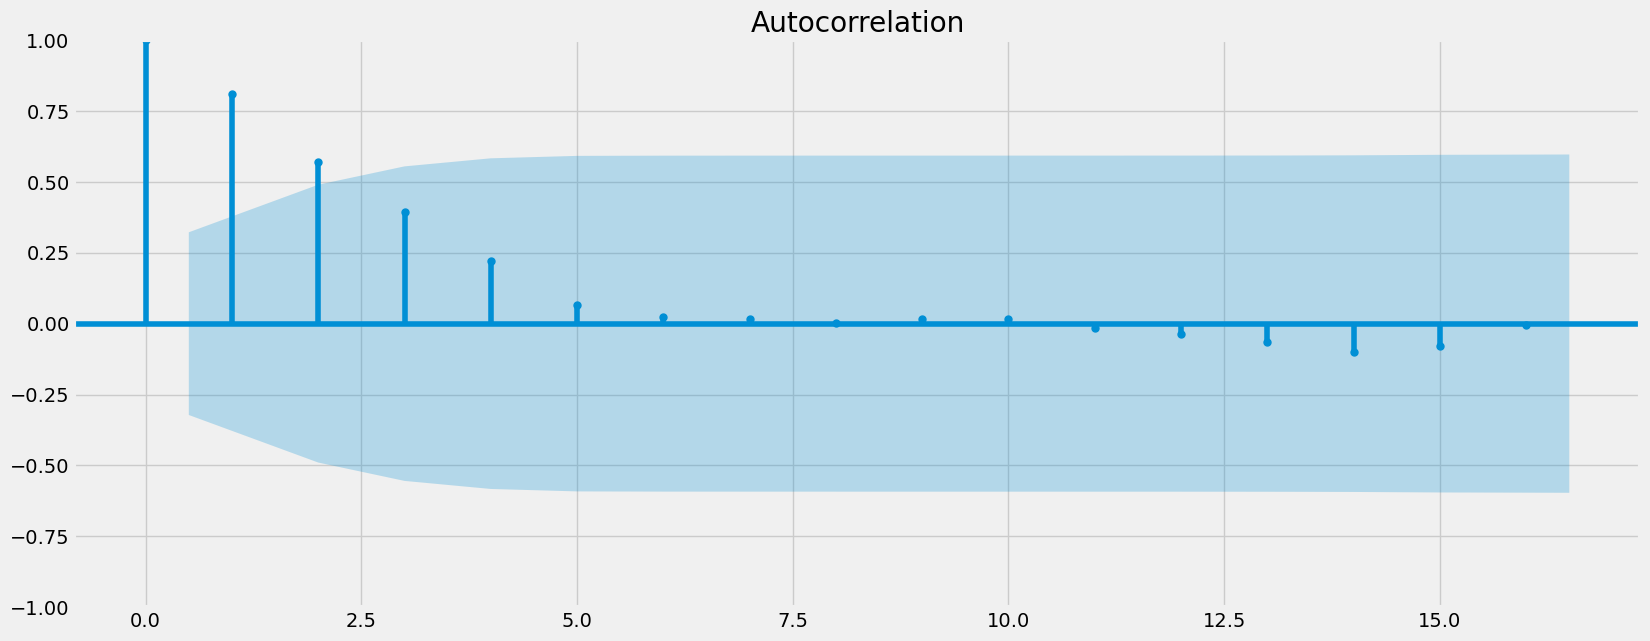

In [14]:
plot_acf(data)
plt.show()